In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bike_sales_india.csv')

In [5]:
df.head()

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10000 non-null  object 
 1   Avg Daily Distance (km)  10000 non-null  float64
 2   Brand                    10000 non-null  object 
 3   Model                    10000 non-null  object 
 4   Price (INR)              10000 non-null  int64  
 5   Year of Manufacture      10000 non-null  int64  
 6   Engine Capacity (cc)     10000 non-null  int64  
 7   Fuel Type                10000 non-null  object 
 8   Mileage (km/l)           10000 non-null  float64
 9   Owner Type               10000 non-null  object 
 10  Registration Year        10000 non-null  int64  
 11  Insurance Status         10000 non-null  object 
 12  Seller Type              10000 non-null  object 
 13  Resale Price (INR)       10000 non-null  float64
 14  City Tier              

In [9]:
df.describe()

,Avg Daily Distance (km),Price (INR),Year of Manufacture,Engine Capacity (cc),Mileage (km/l),Registration Year,Resale Price (INR)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,42.533128,224328.722400,2019.510500,552.695300,67.188926,2020.96510,133828.973998
std,21.676985,100753.660447,2.907668,261.176292,20.891728,2.74897,66613.220382
min,5.010000,50031.000000,2015.000000,100.000000,25.000000,2015.00000,20532.070000
25%,23.907500,137900.250000,2017.000000,327.000000,50.680000,2019.00000,78680.905000
50%,42.480000,223878.000000,2019.000000,553.000000,69.850000,2022.00000,128148.340000
75%,61.352500,311464.250000,2022.000000,780.000000,84.542500,2023.00000,181048.192500
max,80.000000,399981.000000,2024.000000,1000.000000,100.000000,2024.00000,317302.450000


In [11]:
brand = df['Brand'].unique()

In [13]:
models = df['Model'].unique()

In [15]:
states  = df['State'].unique()

In [17]:
df.shape

(10000, 15)

In [19]:
df.size

150000

In [21]:
df.isna().sum()

State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64

In [23]:
df['Insurance Status'].unique()

array(['Active', 'Not Available', 'Expired'], dtype=object)

In [25]:
df['Seller Type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [27]:
df['Fuel Type'].unique()

array(['Electric', 'Hybrid', 'Petrol'], dtype=object)

In [29]:
df.columns

Index(['State', 'Avg Daily Distance (km)', 'Brand', 'Model', 'Price (INR)',
       'Year of Manufacture', 'Engine Capacity (cc)', 'Fuel Type',
       'Mileage (km/l)', 'Owner Type', 'Registration Year', 'Insurance Status',
       'Seller Type', 'Resale Price (INR)', 'City Tier'],
      dtype='object')

In [31]:
df_numeric = df.drop(['State', 'Brand', 'Model','Year of Manufacture', 'Owner Type', 'Registration Year', 'Insurance Status',
       'Seller Type','Fuel Type', 'City Tier'],axis=1)

In [33]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Avg Daily Distance (km)  10000 non-null  float64
 1   Price (INR)              10000 non-null  int64  
 2   Engine Capacity (cc)     10000 non-null  int64  
 3   Mileage (km/l)           10000 non-null  float64
 4   Resale Price (INR)       10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


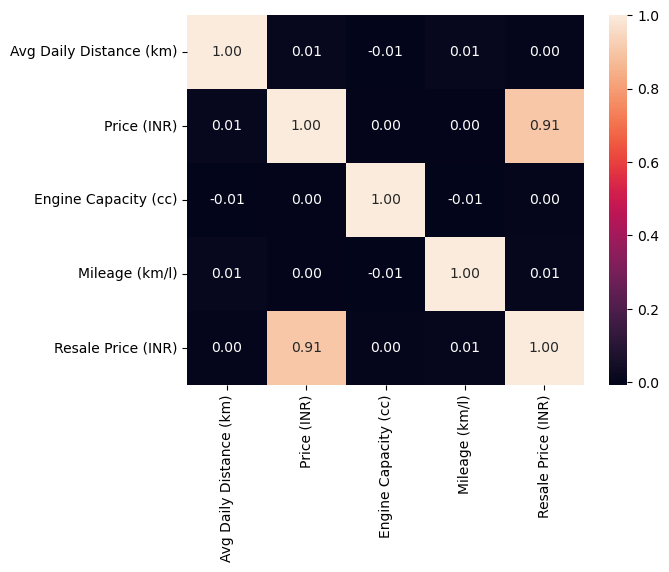

In [35]:
sns.heatmap(df_numeric.corr(),annot=True,fmt='0.2f')
plt.show()

In [37]:
value_counts = df['State'].value_counts()

In [39]:
def percent(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'
    return my_format

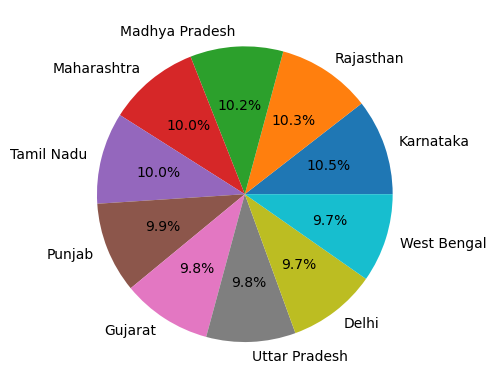

In [41]:
plt.pie(x=value_counts, labels=states, autopct=percent(value_counts))
plt.show()

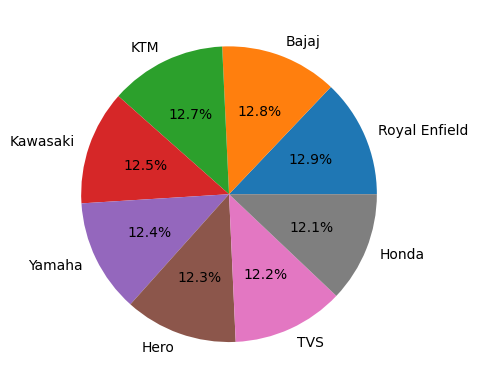

In [43]:
plt.pie(x=df['Brand'].value_counts(), labels=brand, autopct=percent(df['Brand'].value_counts()))
plt.show()

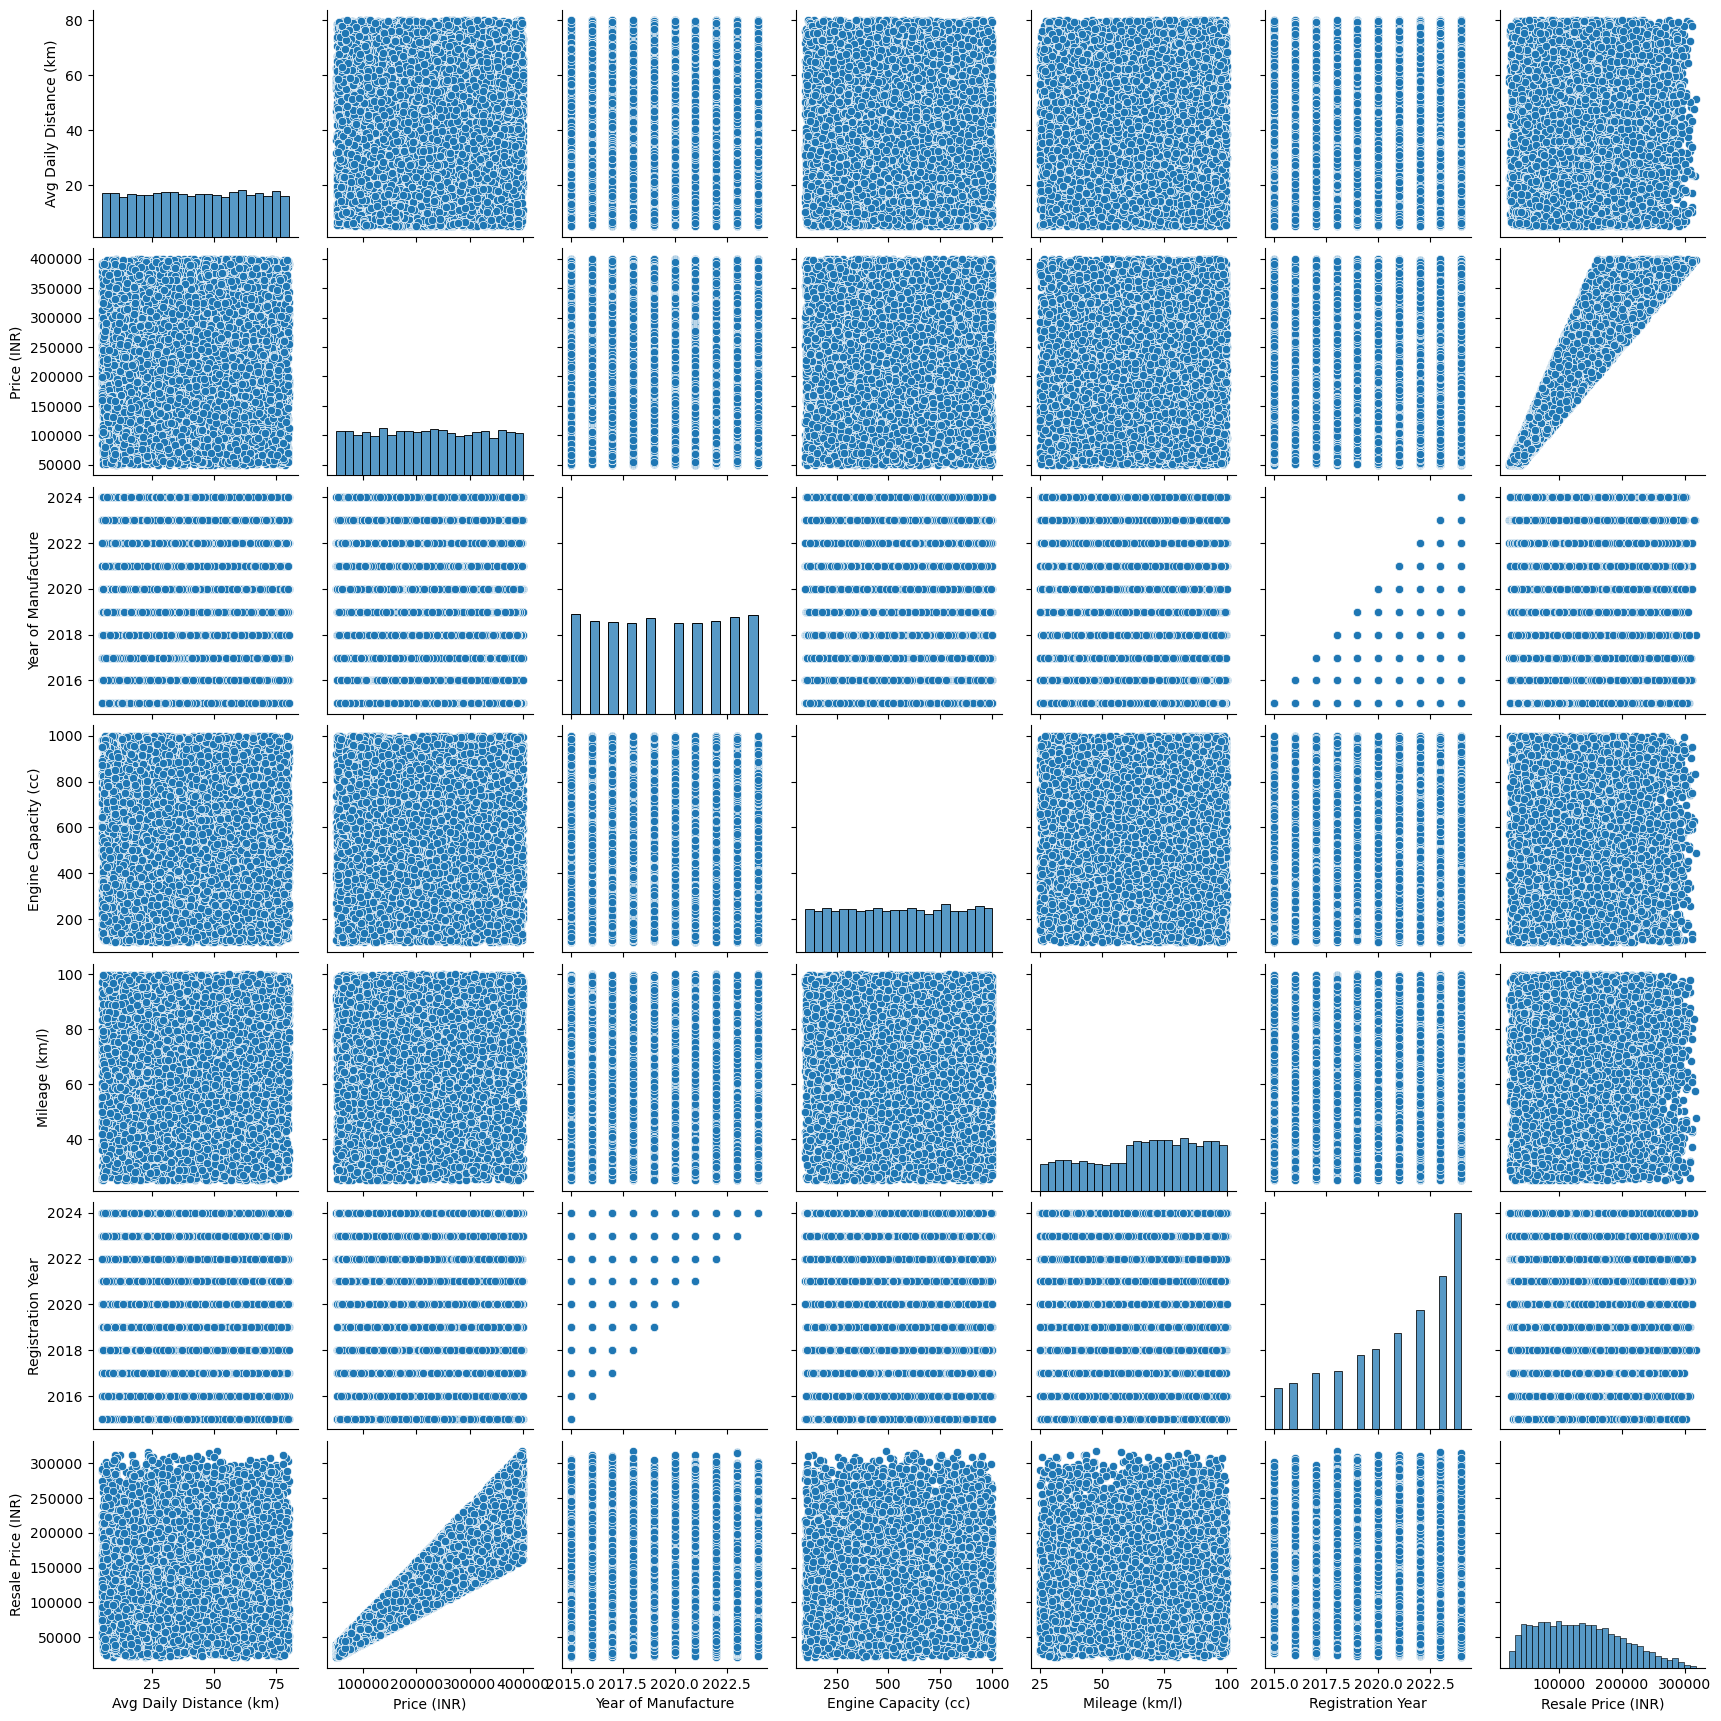

In [45]:
sns.pairplot(data=df)
plt.show()

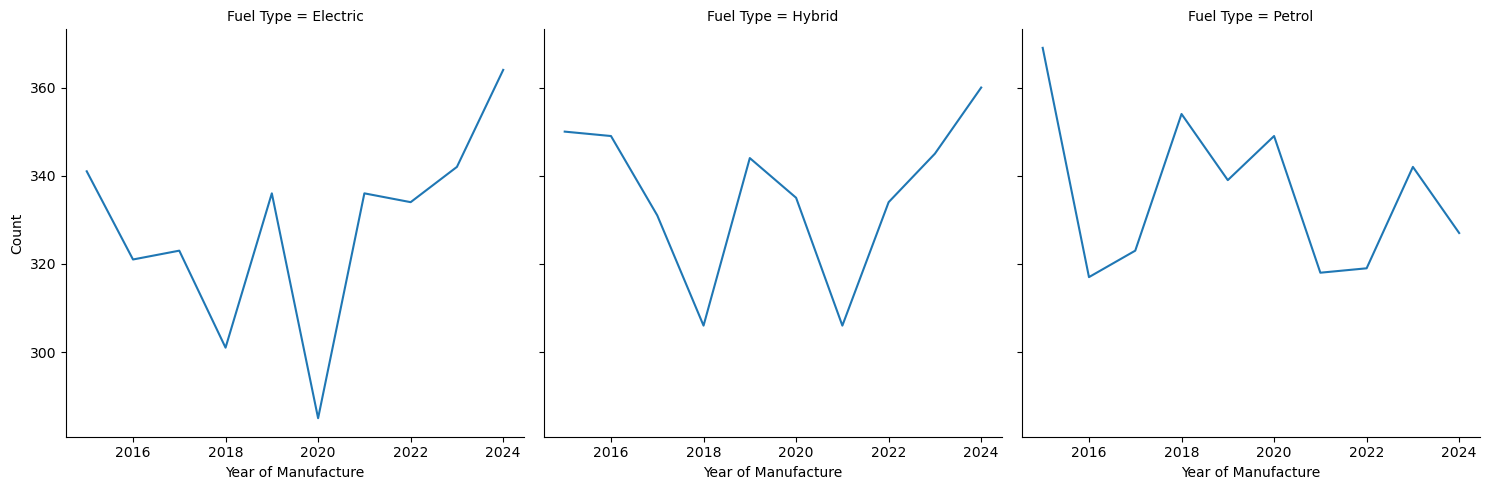

In [46]:
count_data = df.groupby(['Year of Manufacture', 'Fuel Type']).size().reset_index(name='Count')

sns.relplot(data=count_data,x='Year of Manufacture',y='Count',col='Fuel Type', kind='line')

plt.show()

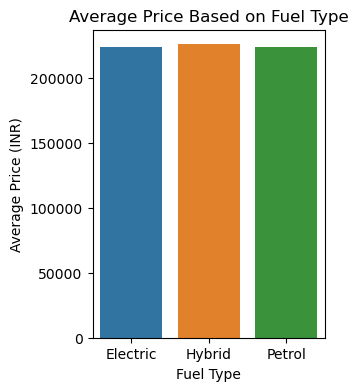

In [129]:
avg_price_per_fuel = df.groupby("Fuel Type")["Price (INR)"].mean().reset_index()

plt.figure(figsize=(3,4))
sns.barplot(data=avg_price_per_fuel, x="Fuel Type", y="Price (INR)",hue="Fuel Type") 
plt.xlabel("Fuel Type")
plt.ylabel("Average Price (INR)")
plt.title("Average Price Based on Fuel Type")
plt.show()

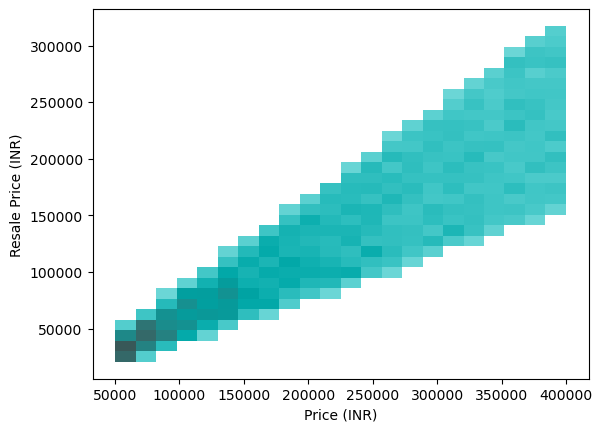

In [61]:
# price vs resale price
sns.histplot(data=df,x='Price (INR)',y='Resale Price (INR)',color='c')
plt.show()

In [48]:
df_count = df['Owner Type'].value_counts().reset_index()
df_count.columns = ['Owner Type', 'Count']


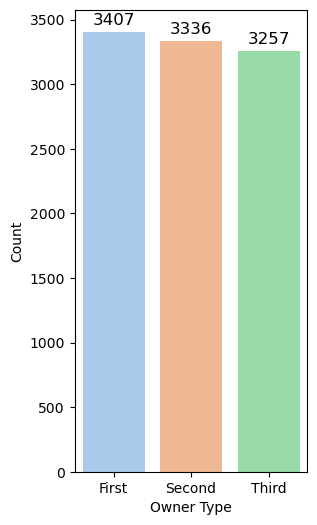

In [143]:
plt.figure(figsize=[3,6])  
ax = sns.barplot(data=df_count, x='Owner Type', y='Count', hue="Owner Type", palette="pastel")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=12)

# Show the plot
plt.show()

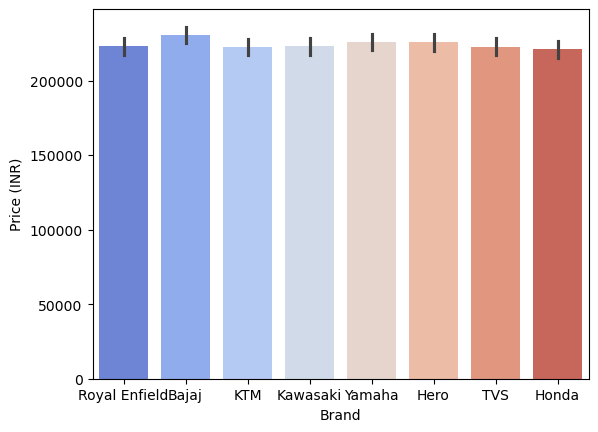

In [149]:
# Price by Brand
x = sns.barplot(data=df,x='Brand',y='Price (INR)',hue='Brand',palette="coolwarm")
for container in x.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=12)

plt.show()

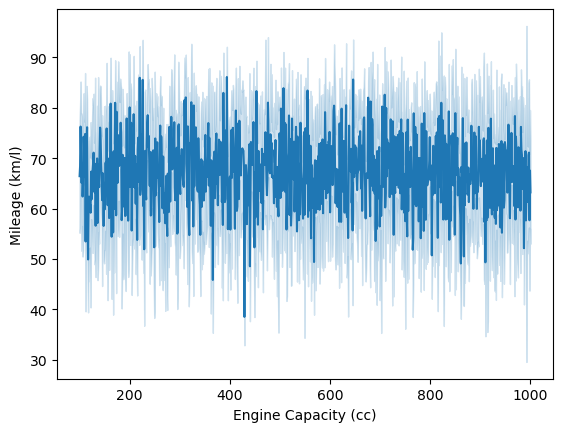

In [71]:
# Engine Capacity vs. Mileage
sns.lineplot(data=df,x='Engine Capacity (cc)',y='Mileage (km/l)')
plt.show()

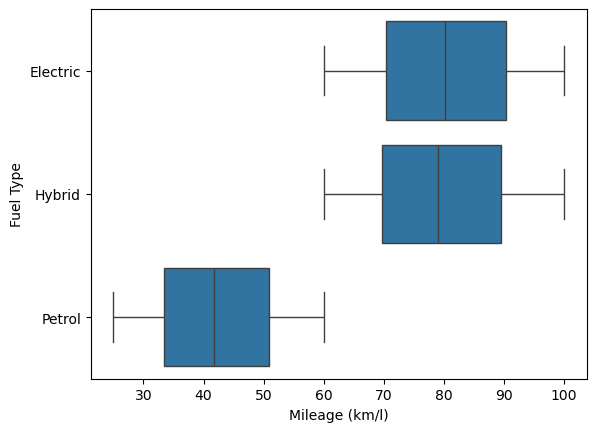

In [73]:
# Mileage by fuel type
sns.boxplot(data=df,x='Mileage (km/l)',y='Fuel Type')
plt.show()

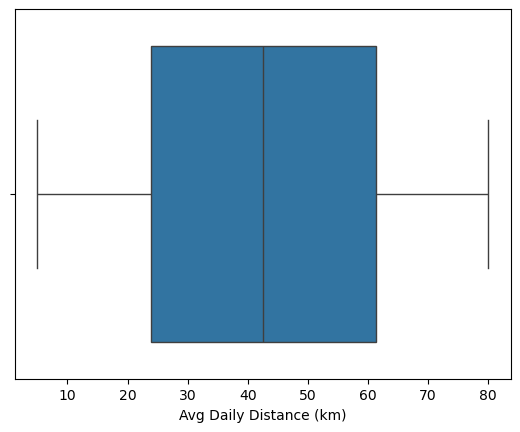

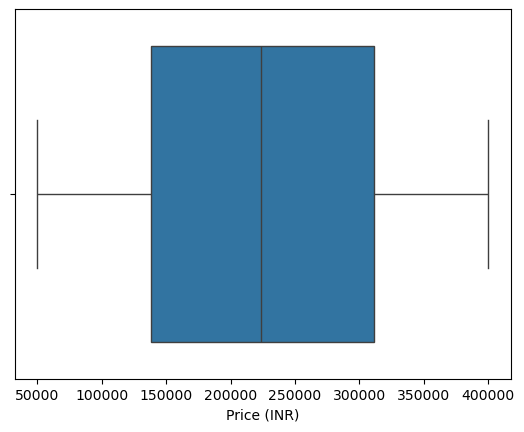

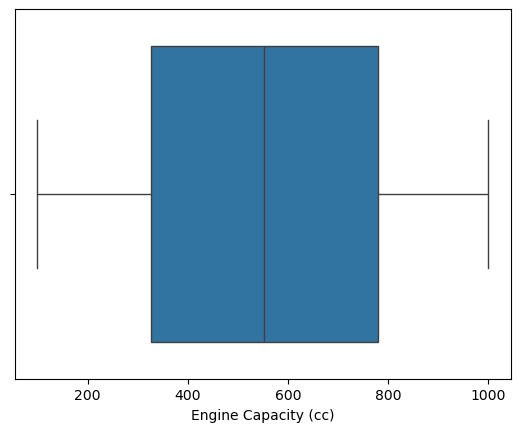

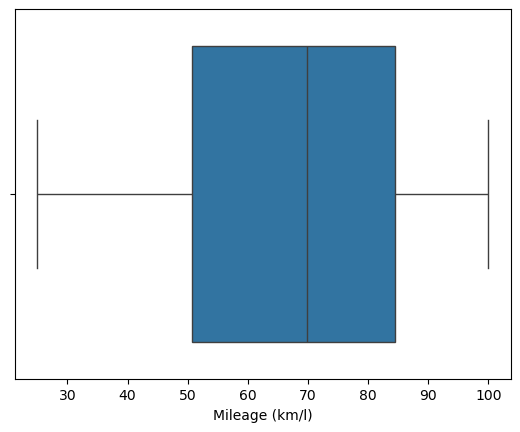

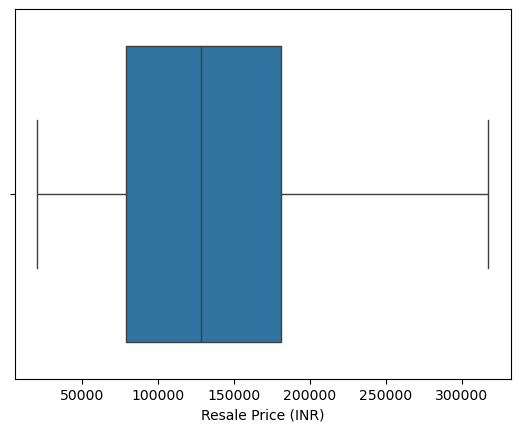

In [77]:
for i in df_numeric:
    sns.boxplot(data=df_numeric,x=i)
    plt.show()

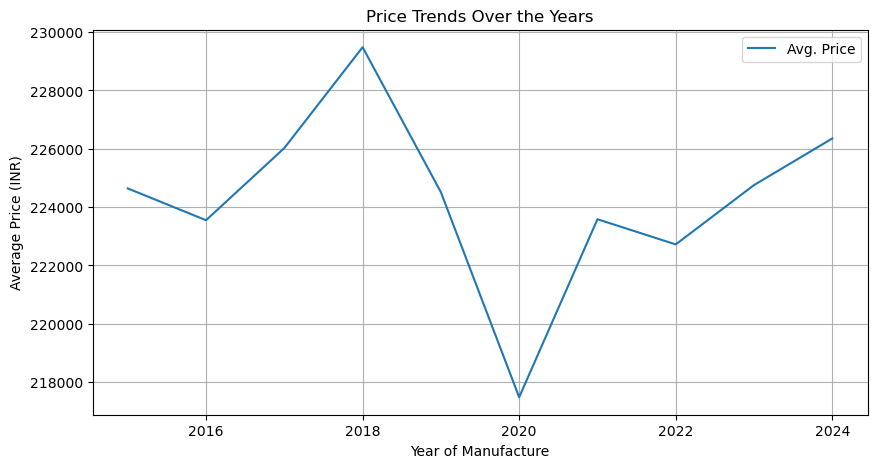

In [81]:
# Year of manufacture by avg price
avg_price_per_year = df.groupby("Year of Manufacture")["Price (INR)"].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, label="Avg. Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Average Price (INR)")
plt.title("Price Trends Over the Years")
plt.legend()
plt.grid(True)
plt.show()

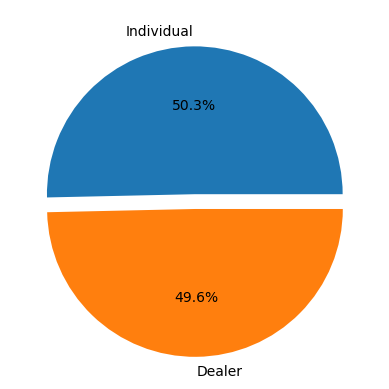

In [95]:
plt.pie(x=df['Seller Type'].value_counts(), labels=df['Seller Type'].unique(), autopct=percent(df['Seller Type'].value_counts()),explode=[0,.1])
plt.show()